# Traitement et analyse de la liste des musiques avant récupération

## Paquets utilisés

In [1]:
import pandas as pd

## Suppression des doublons

In [2]:
songs: pd.Series

print("Removing duplicated songs...", "\n\n")

with open("./datas/songs.txt", "r", encoding="utf8") as file:
    songs_inputs = file.read().splitlines()
    songs = pd.Series(songs_inputs)

    print("Before", "\n", songs, "\n", "...", "\n\n")
    
    # Remove duplicated songs (keep the first)
    songs.drop_duplicates(inplace=True)

    print("After", "\n", songs, "\n", "...")

    with open("./datas/songs.txt", "w", encoding="utf8") as file:
        file.write("\n".join(songs))
        file.close()

    file.close()

Removing duplicated songs... 


Before 
 0                        Charles Aznavour - La bohème
1               Charles Aznavour - Parce que tu crois
2      Charles Aznavour - Ça vient sans qu'on y pense
3                         Charles Aznavour - La route
4                  Charles Aznavour - Il fallait bien
                            ...                      
519                         Therapie TAXI - Superstar
520                   Therapie TAXI - Crystal Memphis
521                     Therapie TAXI - Cri des loups
522                             Therapie TAXI - Zarba
523                     Therapie TAXI - Anti Hit Sale
Length: 524, dtype: object 
 ... 


After 
 0                        Charles Aznavour - La bohème
1               Charles Aznavour - Parce que tu crois
2      Charles Aznavour - Ça vient sans qu'on y pense
3                         Charles Aznavour - La route
4                  Charles Aznavour - Il fallait bien
                            ...                    

## Représentation des artistes

In [3]:
df_songs = songs.str.split(" - ", expand=True, n=1)
df_songs.columns=["artist", "song"]

# Group the songs by artists
df_artists_songs = df_songs.groupby("artist")["song"].apply(list).reset_index(name="songs")

df_artists_songs["songs_count"] = df_artists_songs["songs"].apply(lambda x: len(x))

df_artists_songs.sort_values(by="songs_count", inplace=True, ascending=False)

df_artists_songs

,artist,songs,songs_count
19,Louane,"[Jour 1, Avenir - Radio Edit, Maman, Jeune, To...",37
18,Julien Doré,"[La fièvre, Barracuda I, Kiki, La bise, Nous, ...",33
15,Jacques Brel,"[Grand Jacques (c'est trop facile), Quand on n...",28
13,Grand Corps Malade,"[Derrière le brouillard, Mesdames, Un verre à ...",26
20,Marc Lavoine,"[Le parking des anges, Le temps de vivre, Basc...",24
27,Vanessa Paradis,"[Marilyn & John - Version Longue, Maxou, Le Bo...",22
3,Charles Aznavour,"[La bohème, Parce que tu crois, Ça vient sans ...",22
16,Jean-Jacques Goldman,"[Compte pas sur moi, Je te donne, Famille, La ...",22
22,Nino Ferrer,"[Le sud, La maison près de la fontaine, Un An ...",21
5,Clara Luciani,"[La grenade, La baie, On ne meurt pas d'amour,...",21


<AxesSubplot:xlabel='artist'>

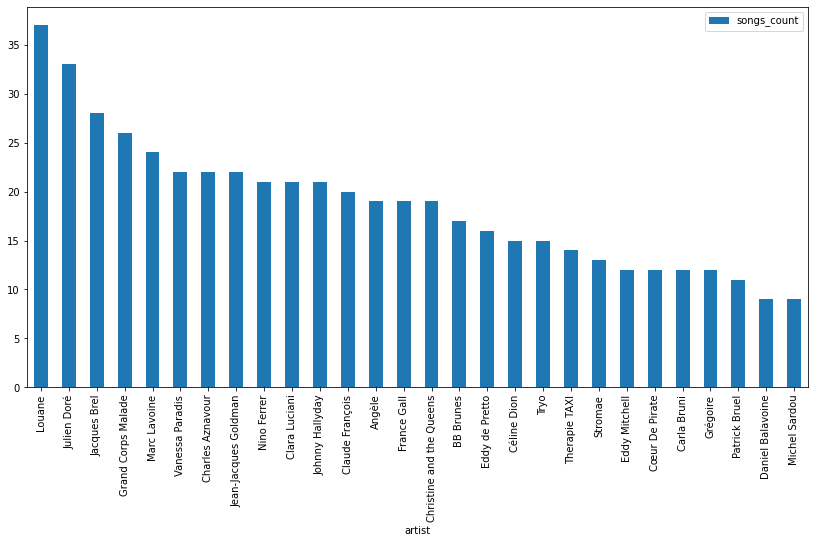

In [4]:
df_artists_songs[:50].plot(kind="bar", x="artist", y="songs_count", figsize=(14, 7))